[View in Colaboratory](https://colab.research.google.com/github/alvarogutyerrez/alvarogutyerrez/blob/master/MasteringPandas.ipynb)

# Business Intelligence para las Finanzas
**Magister en Finanzas**

**Profesor: David Díaz **

**Autor: Álvaro Gutiérrez**

---

#Sesión #2:  Pandas

## ¿Qué es un DataFrame?

Un DataFrame constituye una forma útil de trabajar con datos, la cual nos permite acceder a ellos de una forma más fácil y eficiente que la de numpy. Por ejemplo, se usan típicamente para importar o exportar datos desde archivos planos o bases de datos hacia python. No solo contamos con variables numéricas, si no que también poseemos variables de texto, fechas u objetos exóticos.




### ¿De quién son los DataFrame? (pandas as pd)

Lo primero que debemos tener en la cabeza a la hora de trabajar con este tipo de objetos es que pertenecen a la familia de los pandas (sí, pandas).  Por lo mismo debemos importar dicha librería antes de seguir.

In [0]:
import pandas as pd

### Elementos Basicos de un DataFrame.

Los elementos principales del dataframe son 3.


1.   **Columnas**: El lugar donde se almacenarán los nombres de nuestras variables en la base de datos
2.   **Index**: Es el identificador que le asignará python a cada una de las observaciones de nuestra fila
3.   **Los Datos**: Tienen que ser de tipo Numpy Array. Si se importa una tabla, por ej. csv, serán importados como numpy


In [3]:
import numpy as np 
#Data Simulada
data_df =np.arange(10).reshape((5,2))

#Columnas
col_df =  ['Income', 'Gender']

#Indice
index_df = ['Ind1','Ind2','Ind3','Ind4','Ind5']


my_first_df = pd.DataFrame(data= data_df , columns= col_df , index = index_df )
my_first_df

,Income,Gender
Ind1,0,1
Ind2,2,3
Ind3,4,5
Ind4,6,7
Ind5,8,9


Ahora que hemos visto la estructura básica de los DataFrame, podemos comenzar a trabajar con una base de datos de verdad.

## Importar Data desde Dropbox
Lo primero que necesitaremos será importar la _data_ a nuestro Collaborative. Para importar un archivo desde dropbox, ocuparemos la sintaxis de Linux !wget seguido del link en donde se encuentra la data.


In [0]:
!wget https://www.dropbox.com/s/9j9s51m9nga7i4j/Credit.csv

Ahora hemos importado un cv que podemos convertir en un DataFrame

In [0]:
data=pd.read_csv("Credit.csv",sep=",")

Ahora podemos inspeccionar las columnas de nuestro *objeto*

In [6]:
data.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
0,1,19/07/1926,Female,Married,2.0,Administrative,Own,562.0,1606.0,No,Yes,high,Balanced
1,2,13/12/1936,Female,Married,1.0,NaN,Own,550.0,1573.0,No,Yes,high,60 days late
2,3,25/01/1928,Male,Married,0.0,NaN,Own,633.0,1583.0,No,Yes,high,60 days late
3,4,29/11/1931,Male,Married,0.0,NaN,Own,487.0,1624.0,No,Yes,high,30 days late
4,5,19/12/1913,Male,Widowed,0.0,NaN,Own,696.0,1990.0,No,Yes,high,60 days late


In [7]:
columnas = data.columns
columnas



Index([u'ID', u'DOB', u'Gender', u'Marital_Status', u'Nbr_Children',
       u'Occupation', u'Home', u'Mo_Expenses', u'Mo_Income',
       u'Checking_Account', u'Savings_Account', u'Credit_limit',
       u'Account_Status'],
      dtype='object')

In [8]:
listacolumnas=data.columns.tolist()
listacolumnas

['ID',
 'DOB',
 'Gender',
 'Marital_Status',
 'Nbr_Children',
 'Occupation',
 'Home',
 'Mo_Expenses',
 'Mo_Income',
 'Checking_Account',
 'Savings_Account',
 'Credit_limit',
 'Account_Status']


#### Indice 

Podemos acceder al indice del DataFrame de la siguiente forma.



In [9]:
index = data.index
index

RangeIndex(start=0, stop=407, step=1)

## LOC e ILOC 

### ILOC: Llamando a los datos por el la posición en la que están

Esta opción nos permite acceder a posiciones específicas de los objetos escribiendo sus coordenadas. Por ejemplo




In [10]:
#Elemento coordenada 0,0
print(data.iloc[0,0])
#Elemento en la última fila y última columna
print(data.iloc[-1,-1])

#Segunda Columna 
print(data.iloc[:,1]).head(5)

#Primera Fila
print(data.iloc[0,:])

1
Balanced
0    19/07/1926
1    13/12/1936
2    25/01/1928
3    29/11/1931
4    19/12/1913
Name: DOB, dtype: object
ID                               1
DOB                     19/07/1926
Gender                      Female
Marital_Status             Married
Nbr_Children                     2
Occupation          Administrative
Home                           Own
Mo_Expenses                    562
Mo_Income                     1606
Checking_Account                No
Savings_Account                Yes
Credit_limit                  high
Account_Status            Balanced
Name: 0, dtype: object


### LOC: Llamando a los datos por su nombre
Esta opción nos permite acceder a los datos ocupando tanto el nombre de las columnas como el indice de las mismas.




In [11]:
#Toda la columna Mo_Income
print(data.loc[:,'Mo_Income']).head(5)
#Primera fila de la columnas Mo_Income
#En este caso debe quedar claro que el indice justamente fue un numero, por lo que su "nombre" corresponde a un float64
print(data.loc[1,'Mo_Income'])


0    1606.0
1    1573.0
2    1583.0
3    1624.0
4    1990.0
Name: Mo_Income, dtype: float64
1573.0


## Estadística Descriptiva

solamente ocupando **.descriptive()** podemos generar estadística descriptiva de todo el DataFrame. Pero este solamente generará estadísticas para las variables numéricas.

In [12]:
stats=data.describe()
stats

,ID,Nbr_Children,Mo_Expenses,Mo_Income
count,407.000000,364.000000,4.040000e+02,4.050000e+02
mean,204.000000,1.436813,7.606128e+05,4.679984e+05
std,117.635029,0.606545,1.527379e+07,9.371494e+06
min,1.000000,0.000000,2.530000e+02,1.002000e+03
25%,102.500000,1.000000,4.540000e+02,1.379000e+03
50%,204.000000,1.000000,5.690000e+02,1.863000e+03
75%,305.500000,2.000000,9.555000e+02,3.345000e+03
max,407.000000,3.000000,3.070000e+08,1.886000e+08


Para una columna en particular, por ejemplo **Montly_Expenses** debemos llamarla con corchetes

In [13]:
stats_mo=data['Mo_Expenses'].describe()
stats_mo

count    4.040000e+02
mean     7.606128e+05
std      1.527379e+07
min      2.530000e+02
25%      4.540000e+02
50%      5.690000e+02
75%      9.555000e+02
max      3.070000e+08
Name: Mo_Expenses, dtype: float64

También se puede recuperar estadística descriptiva de las variables categóricas, pero esta solamente despliega un análisis de frecuencia y duplicados.

In [14]:
stats_gen=data['Gender'].describe()
stats_gen

count      407
unique       2
top       Male
freq       289
Name: Gender, dtype: object

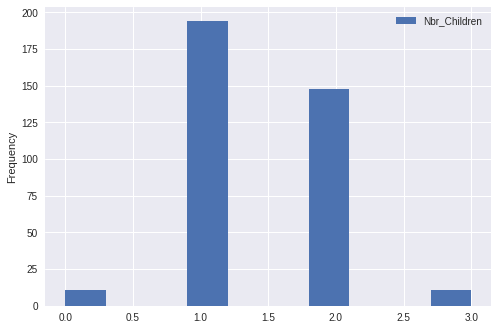

In [16]:
data.plot(kind='hist',y='Nbr_Children',x='Gender')

##Filtros

### Basados en un Categoria
Se puede seccionar una porción reducida del DataFrame, en base a alguna característica. Por ejemplo, podríamos generar un nuevo DataFrame que solo contenga a las mujeres


In [17]:
female=data[data['Gender']=='Female']
female.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
0,1,19/07/1926,Female,Married,2.0,Administrative,Own,562.0,1606.0,No,Yes,high,Balanced
1,2,13/12/1936,Female,Married,1.0,NaN,Own,550.0,1573.0,No,Yes,high,60 days late
5,6,03/12/1925,Female,Married,1.0,Administrative,Own,515.0,1908.0,No,Yes,high,60 days late
7,8,06/12/1950,Female,Married,2.0,NaN,Rent,482.0,1607.0,No,Yes,low,Balanced
8,9,01/01/1929,Female,Married,0.0,NaN,Own,720.0,1799.0,No,Yes,high,60 days late


### Basados en una Variable Continua

Podemos generar un DataFrame que solo contenga a los individuos que tengan una renta mensual **Mo_Income** mayor a 1000.

In [18]:
morethan1000=data[data['Mo_Income']>1000]
morethan1000.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
0,1,19/07/1926,Female,Married,2.0,Administrative,Own,562.0,1606.0,No,Yes,high,Balanced
1,2,13/12/1936,Female,Married,1.0,NaN,Own,550.0,1573.0,No,Yes,high,60 days late
2,3,25/01/1928,Male,Married,0.0,NaN,Own,633.0,1583.0,No,Yes,high,60 days late
3,4,29/11/1931,Male,Married,0.0,NaN,Own,487.0,1624.0,No,Yes,high,30 days late
4,5,19/12/1913,Male,Widowed,0.0,NaN,Own,696.0,1990.0,No,Yes,high,60 days late


### Mas de una condicion a la vez

#### Ambas simultaneamente

Se puede establecer más de una condicion lógica como con el operador lógico &, que es equivalente a "and".


In [19]:
both_and=data[(data['Gender']=='Female')&(data['Mo_Income']>1000)]
both_and.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
0,1,19/07/1926,Female,Married,2.0,Administrative,Own,562.0,1606.0,No,Yes,high,Balanced
1,2,13/12/1936,Female,Married,1.0,NaN,Own,550.0,1573.0,No,Yes,high,60 days late
5,6,03/12/1925,Female,Married,1.0,Administrative,Own,515.0,1908.0,No,Yes,high,60 days late
7,8,06/12/1950,Female,Married,2.0,NaN,Rent,482.0,1607.0,No,Yes,low,Balanced
8,9,01/01/1929,Female,Married,0.0,NaN,Own,720.0,1799.0,No,Yes,high,60 days late


#### Al menos una de las dos condiciones
Se puede establecer una condicion lógica con el operador "|", el cual significa "or". En donde se mantendrá en la base si cumple con al menos una de estas.


In [20]:
both_or=data[(data['Gender']=='Male')|(data['Mo_Income']>1000)]
both_or.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
0,1,19/07/1926,Female,Married,2.0,Administrative,Own,562.0,1606.0,No,Yes,high,Balanced
1,2,13/12/1936,Female,Married,1.0,NaN,Own,550.0,1573.0,No,Yes,high,60 days late
2,3,25/01/1928,Male,Married,0.0,NaN,Own,633.0,1583.0,No,Yes,high,60 days late
3,4,29/11/1931,Male,Married,0.0,NaN,Own,487.0,1624.0,No,Yes,high,30 days late
4,5,19/12/1913,Male,Widowed,0.0,NaN,Own,696.0,1990.0,No,Yes,high,60 days late



## Ordenamiento de los datos
### Variable Categorica

Podemos ordenar de mayor a menor los datos por alguna variable de nuestro interés. Por ejemplo para ordenar por Gender.



In [0]:
data=data.sort_values(by='Gender',ascending=False)

### Variable Continua

In [29]:
data=data.sort_values(by='Mo_Income',ascending=False)
data.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
317,318,1917-06-17,Female,Married,NaN,Professional,Own,566.0,188600000.0,Yes,Yes,very low,Balanced
266,267,1949-06-01,Male,Married,1.0,NaN,Own,1571.0,4488.0,No,Yes,mid-level,Balanced
244,245,1927-12-19,Female,Married,1.0,Manager,Own,1771.0,4427.0,No,Yes,mid-level,Balanced
225,226,1913-03-24,Male,Single,1.0,Professional,Own,1327.0,4425.0,No,Yes,high,Balanced
388,389,1916-03-13,Male,Married,1.0,Professional,Own,1770.0,4424.0,No,Yes,low,Balanced


## Muestreo Aleatorio
Podemos generar una muestra aleatoria de datos de diferentes maneras.




In [23]:
sample100obs=data.sample(100)
sample100obs.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
264,265,08/08/1949,Male,Married,1.0,Professional,Own,961.0,3559.0,No,Yes,mid-level,Balanced
258,259,18/03/1917,Female,Married,1.0,NaN,Own,887.0,2218.0,No,Yes,low,Balanced
364,365,16/07/1929,Male,Married,2.0,Professional,Own,1268.0,3624.0,No,Yes,low,Balanced
79,80,17/12/1926,Male,Single,1.0,NaN,Rent,553.0,3382.0,No,Yes,high,30 days late
238,239,11/02/1921,Female,Married,1.0,Professional,Own,735.0,2100.0,Yes,Yes,low,Balanced


También se puede especificar una muestra como fraccion del total. Por ejemplo 10% de la muestra.

In [24]:
sample10_percent=data.sample(frac=0.1)
sample10_percent.head(5)

,ID,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status
105,106,01/03/1917,Male,Widowed,1.0,NaN,Own,408.0,1021.0,No,Yes,high,30 days late
177,178,17/10/1916,Male,Married,1.0,NaN,Own,307000000.0,1025.0,Yes,Yes,high,30 days late
88,89,06/03/1916,Male,Married,2.0,Skilled,Own,362.0,1207.0,No,No,mid-level,Balanced
213,214,26/01/1925,Female,Married,2.0,Professional,Own,1100.0,3142.0,Yes,Yes,high,Balanced
303,304,19/03/1938,Male,Married,1.0,NaN,Own,456.0,1140.0,No,Yes,mid-level,Balanced


Finalmente, también podemos especificar si el muestro es con reemplazo o no.


In [0]:
sample10_percent_resample=data.sample(frac=0.1,replace=True)

## Formateando Fecha
En la siguiente linea de comando haremos que python reconozca que la columna DOB (Date of Birth). Es una fecha, con lo que podremos generar operaciones básicas, como por ejemplo calcular la edad. 
Ocuparemos la funcion _to_datetime_ de la librería pandas (pd) para entregarle darle el formato correcto a esta variable, la que hasta ahora está almacenada como un objeto. 

Ahora le diremos que la forma en la que está almacenada la fecha corresponde a "día" (%d), "mes" (%m) y "año" (%Y).

In [26]:
data['DOB']=pd.to_datetime(data['DOB'],format="%d/%m/%Y")
data['DOB'].head(5)

317   1917-06-17
266   1949-06-01
244   1927-12-19
225   1913-03-24
388   1916-03-13
Name: DOB, dtype: datetime64[ns]

In [27]:
data['DOB'].head(5)



317   1917-06-17
266   1949-06-01
244   1927-12-19
225   1913-03-24
388   1916-03-13
Name: DOB, dtype: datetime64[ns]